In [ ]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.utils import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")


Done


In [ ]:
!apt-get update
!apt-get install -y libsndfile1

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,801 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,346 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricte

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

ravdess = "drive/MyDrive/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

# Filter out files in .ipynb_checkpoints directory
ravdess_directory_list = [file for file in ravdess_directory_list if not file.startswith('.ipynb_checkpoints')]

# Access the remaining files
#


['Actor_21', 'Actor_18', 'Actor_17', 'Actor_15', 'Actor_24', 'Actor_19', 'Actor_16', 'Actor_20', 'Actor_23', 'Actor_22', 'Actor_10', 'Actor_05', 'Actor_06', 'Actor_14', 'Actor_08', 'Actor_11', 'Actor_07', 'Actor_12', 'Actor_09', 'Actor_13', 'Actor_04', 'Actor_01', 'Actor_03', 'Actor_02']


In [ ]:
Crema = "drive/MyDrive/kaggle/input/cremad/AudioWAV/"
Tess = "drive/MyDrive/kaggle/input/toronto-emotional-speech-set-tess/TESS toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "drive/MyDrive/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [ ]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess+ i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)

In [ ]:

# Print the first element of the 'actor' list
print(actor[0])

# Print the first element of the 'part' list
print(part[0])

# Print the first element of the 'file_path' list
print(file_path[0])

# Convert the third element of the 'part' list to an integer and print it
print(int(part[2]))

# Print the value stored in the variable 'f'
print(f)

03-01-02-01-02-01-02.wav
03
drive/MyDrive/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_21/03-01-02-01-01-02-21.wav
8
03-01-08-01-01-01-02.wav


In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  drive/MyDrive/kaggle/input/ravdess-emotional-s...
1    happy  drive/MyDrive/kaggle/input/ravdess-emotional-s...
2  neutral  drive/MyDrive/kaggle/input/ravdess-emotional-s...
3  neutral  drive/MyDrive/kaggle/input/ravdess-emotional-s...
4  neutral  drive/MyDrive/kaggle/input/ravdess-emotional-s...
______________________________________________
      Emotions                                               Path
1435  surprise  drive/MyDrive/kaggle/input/ravdess-emotional-s...
1436  surprise  drive/MyDrive/kaggle/input/ravdess-emotional-s...
1437  surprise  drive/MyDrive/kaggle/input/ravdess-emotional-s...
1438  surprise  drive/MyDrive/kaggle/input/ravdess-emotional-s...
1439  surprise  drive/MyDrive/kaggle/input/ravdess-emotional-s...
_______________________________________________
neutral     288
happy       192
sad         192
angry       192
fear        192
surprise    192
disgust     192
Name: Emotions, dtype: in

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

disgust    255
happy      255
fear       255
angry      255
sad        253
neutral    215
Name: Emotions, dtype: int64


In [ ]:
print(Tess)
tess_directory_list = os.listdir(Tess)


file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

drive/MyDrive/kaggle/input/toronto-emotional-speech-set-tess/TESS toronto emotional speech set data/TESS Toronto emotional speech set data/
Series([], Name: Emotions, dtype: int64)


In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

neutral     120
angry        60
disgust      60
fear         60
happy        60
surprise     60
sad          60
Name: Emotions, dtype: int64


In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()


,Emotions,Path
0,neutral,drive/MyDrive/kaggle/input/ravdess-emotional-s...
1,happy,drive/MyDrive/kaggle/input/ravdess-emotional-s...
2,neutral,drive/MyDrive/kaggle/input/ravdess-emotional-s...
3,neutral,drive/MyDrive/kaggle/input/ravdess-emotional-s...
4,neutral,drive/MyDrive/kaggle/input/ravdess-emotional-s...


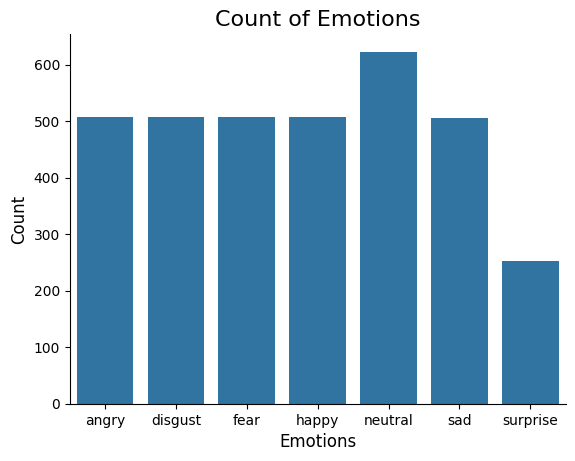

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Emotions' is treated as a categorical variable
data_path['Emotions'] = data_path['Emotions'].astype('category')

# Specify the data parameter in countplot
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
data,sr = librosa.load(file_path[0])
sr

22050

In [ ]:
ipd.Audio(data,rate=sr)

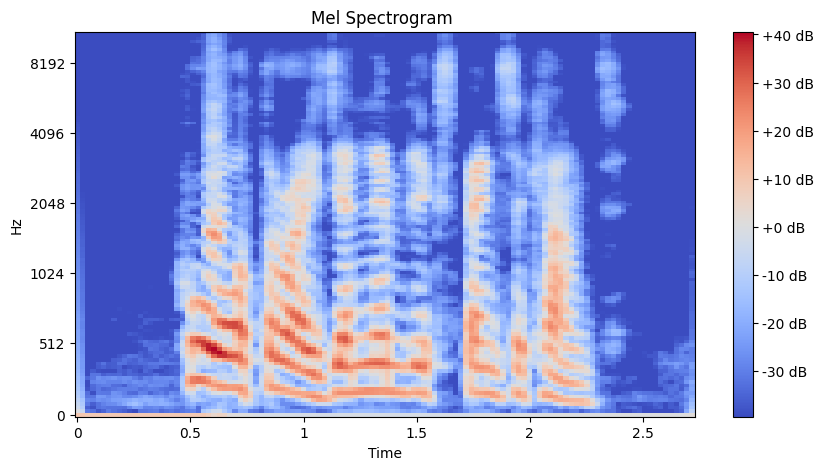

In [ ]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

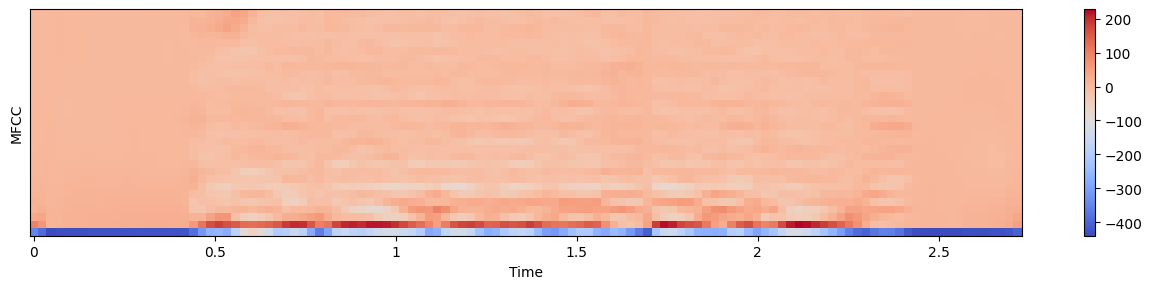

In [ ]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [ ]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

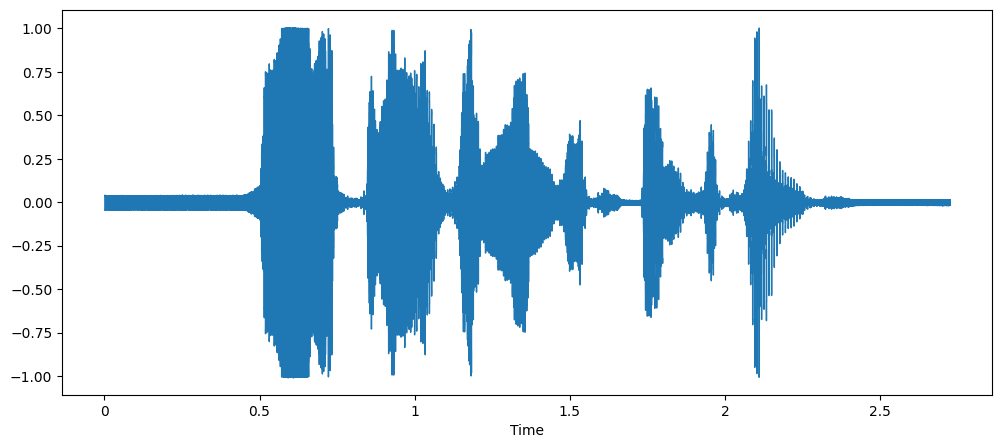

In [ ]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

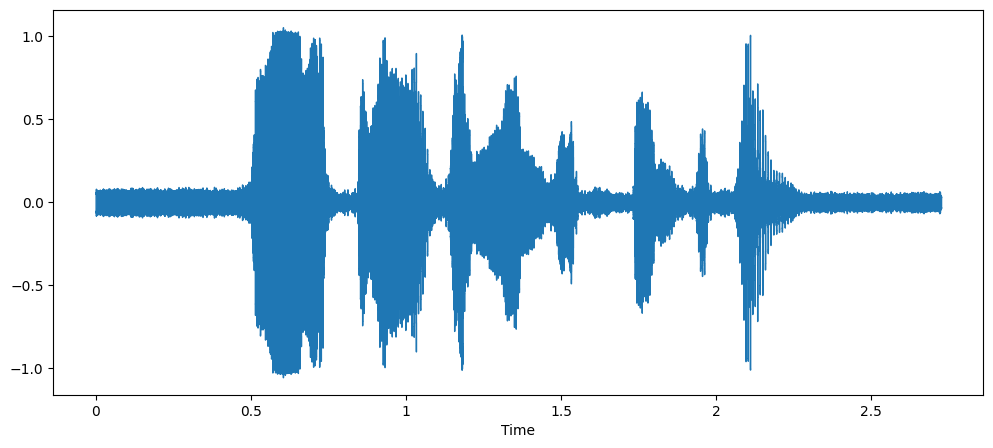

In [ ]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [ ]:
pip install --upgrade librosa

In [ ]:
pip show librosa

Name: librosa
Version: 0.10.1
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: /usr/local/lib/python3.10/dist-packages
Requires: audioread, decorator, joblib, lazy-loader, msgpack, numba, numpy, pooch, scikit-learn, scipy, soundfile, soxr, typing-extensions
Required-by: 


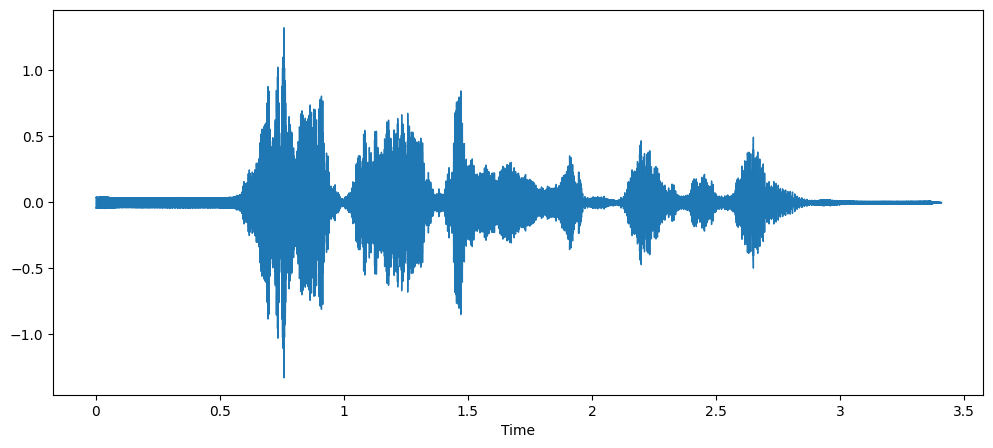

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

# Assuming 'data' and 'sr' are already defined
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

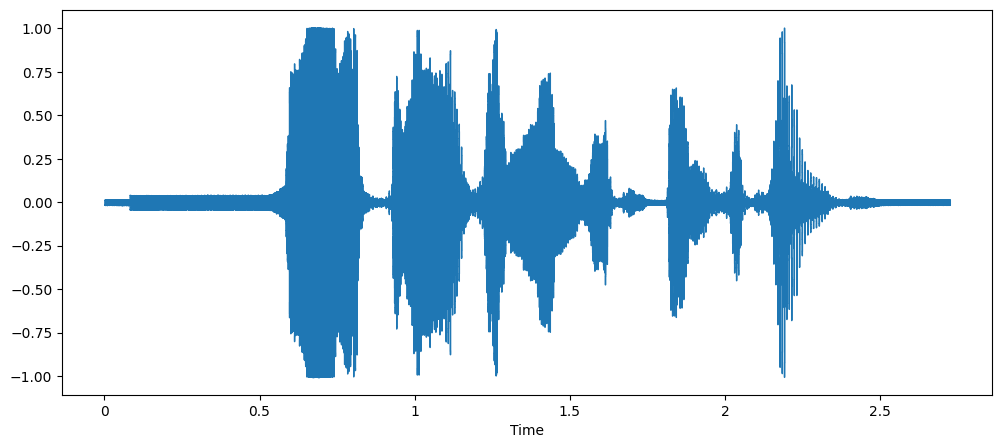

In [ ]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

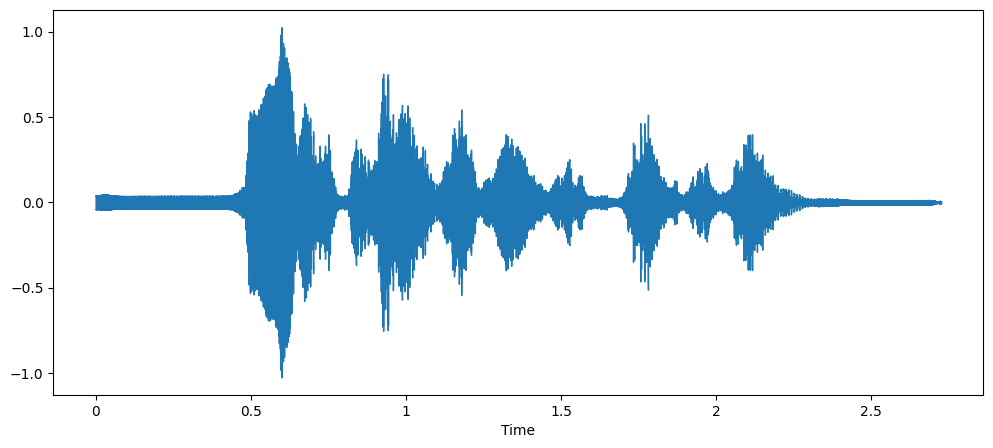

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

# Assuming 'data' and 'sr' are already defined
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())


Number of processors:  2


In [ ]:
import timeit
import librosa
import numpy as np
from tqdm import tqdm

# Assuming your get_features, zcr, rmse, and noise functions are defined somewhere

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        my_mfcc(data, sr=sr, n_fft=frame_length, hop_length=hop_length)
                        ))
    return result

def my_mfcc(data, sr, n_fft=2048, hop_length=512, flatten: bool = True):
    mfcc_result = librosa.feature.mfcc(y=data, sr=sr, n_fft=n_fft, hop_length=hop_length)
    return np.squeeze(mfcc_result.T) if not flatten else np.ravel(mfcc_result.T)

start = timeit.default_timer()

X, Y = [], []

for index, (path, emotion) in tqdm(enumerate(zip(data_path.Path, data_path.Emotions))):
    features = get_features(path)

    for i in features:
        X.append(i)
        Y.append(emotion)

    if index % 500 == 0:
        tqdm.write(f'{index} audio has been processed')

print('Done')

stop = timeit.default_timer()
print('Time: ', stop - start)

1it [00:00,  1.01it/s]

0 audio has been processed


501it [04:24,  2.35it/s]

500 audio has been processed


1001it [08:21,  1.86it/s]

1000 audio has been processed


1501it [12:15,  1.87it/s]

1500 audio has been processed


2001it [15:50,  2.24it/s]

2000 audio has been processed


2501it [19:20,  2.27it/s]

2500 audio has been processed


3001it [22:58,  2.18it/s]

3000 audio has been processed


3408it [26:02,  2.18it/s]

Done
Time:  1562.9198082139999


In [ ]:
len(X), len(Y), data_path.Path.shape

(13632, 13632, (3408,))

In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.127930,0.193848,0.262207,0.271973,0.273438,0.298828,0.325684,0.416992,0.546387,0.670410,...,-18.710144,9.695335,10.506334,7.358394,-9.695587,11.957130,-6.484877,-13.399317,9.400709,neutral
1,0.248047,0.373047,0.495117,0.500000,0.493164,0.495117,0.498047,0.495605,0.509277,0.506836,...,-0.792057,4.052363,7.432855,2.398096,-3.367203,1.280515,5.228324,3.111898,-1.492043,neutral
2,0.104492,0.156738,0.208008,0.207031,0.209473,0.202637,0.209961,0.215820,0.229004,0.250488,...,-15.125869,16.321732,11.901515,-6.791699,-12.560765,4.049634,-20.835987,-8.737868,-5.701085,neutral
3,0.106445,0.158691,0.208984,0.207031,0.208496,0.201660,0.211914,0.215820,0.230957,0.257324,...,-15.186571,16.343676,11.927961,-6.856121,-12.568799,4.039207,-20.878557,-8.754551,-5.738369,neutral
4,0.353516,0.526367,0.622070,0.556152,0.426758,0.310547,0.310059,0.361816,0.444824,0.559570,...,2.897166,2.136937,3.840182,5.582154,4.510328,1.478559,-0.332854,-0.007086,0.187825,happy


In [ ]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.127930,0.193848,0.262207,0.271973,0.273438,0.298828,0.325684,0.416992,0.546387,0.670410,...,-18.710144,9.695335,10.506334,7.358394,-9.695587,11.957130,-6.484877,-13.399317,9.400709,neutral
1,0.248047,0.373047,0.495117,0.500000,0.493164,0.495117,0.498047,0.495605,0.509277,0.506836,...,-0.792057,4.052363,7.432855,2.398096,-3.367203,1.280515,5.228324,3.111898,-1.492043,neutral
2,0.104492,0.156738,0.208008,0.207031,0.209473,0.202637,0.209961,0.215820,0.229004,0.250488,...,-15.125869,16.321732,11.901515,-6.791699,-12.560765,4.049634,-20.835987,-8.737868,-5.701085,neutral
3,0.106445,0.158691,0.208984,0.207031,0.208496,0.201660,0.211914,0.215820,0.230957,0.257324,...,-15.186571,16.343676,11.927961,-6.856121,-12.568799,4.039207,-20.878557,-8.754551,-5.738369,neutral
4,0.353516,0.526367,0.622070,0.556152,0.426758,0.310547,0.310059,0.361816,0.444824,0.559570,...,2.897166,2.136937,3.840182,5.582154,4.510328,1.478559,-0.332854,-0.007086,0.187825,happy


In [ ]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [ ]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(13632, 2377)

In [ ]:
np.sum(Emotions.isna())


0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [ ]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
print(Y.shape)
X.shape

(13632, 7)


(13632, 2376)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10905, 2376), (10905, 7), (2727, 2376), (2727, 7))

In [ ]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10905, 2376), (10905, 7), (2727, 2376), (2727, 7))

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('drive\MyDrive\Kaggle\working\best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((10905, 2376, 1), (10905, 7), (2727, 2376, 1), (2727, 7))

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                        

In [ ]:
history=model.fit(x_traincnn, y_train, epochs=30, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/30
171/171 [==============================] - ETA: 0s - loss: 0.0926 - accuracy: 0.9722

171/171 [==============================] - 58s 337ms/step - loss: 0.0926 - accuracy: 0.9722 - val_loss: 0.5265 - val_accuracy: 0.8365 - lr: 0.0010
Epoch 2/30
171/171 [==============================] - ETA: 0s - loss: 0.0905 - accuracy: 0.9717

171/171 [==============================] - 59s 343ms/step - loss: 0.0905 - accuracy: 0.9717 - val_loss: 0.3312 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 3/30
171/171 [==============================] - ETA: 0s - loss: 0.0762 - accuracy: 0.9770

171/171 [==============================] - 57s 333ms/step - loss: 0.0762 - accuracy: 0.9770 - val_loss: 0.3156 - val_accuracy: 0.9028 - lr: 0.0010
Epoch 4/30
171/171 [==============================] - ETA: 0s - loss: 0.0584 - accuracy: 0.9834

171/171 [==============================] - 59s 347ms/step - loss: 0.0584 - accuracy: 0.9834 - val_loss: 0.2631 - val_accuracy: 0.9193 - lr: 0.0010
Epoch 5/30
171/171 [==============================] - ETA: 0s - loss: 0.0585 - accuracy: 0.9838

171/171 [==============================] - 57s 333ms/step - loss: 0.0585 - accuracy: 0.9838 - val_loss: 0.2441 - val_accuracy: 0.9226 - lr: 0.0010
Epoch 6/30
171/171 [==============================] - ETA: 0s - loss: 0.0736 - accuracy: 0.9771

171/171 [==============================] - 58s 341ms/step - loss: 0.0736 - accuracy: 0.9771 - val_loss: 0.4288 - val_accuracy: 0.8691 - lr: 0.0010
Epoch 7/30
171/171 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9728

171/171 [==============================] - 58s 341ms/step - loss: 0.0878 - accuracy: 0.9728 - val_loss: 0.3307 - val_accuracy: 0.8900 - lr: 0.0010
Epoch 8/30
171/171 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.9785

171/171 [==============================] - 58s 341ms/step - loss: 0.0679 - accuracy: 0.9785 - val_loss: 0.3515 - val_accuracy: 0.8915 - lr: 0.0010
Epoch 9/30
171/171 [==============================] - ETA: 0s - loss: 0.0614 - accuracy: 0.9818

171/171 [==============================] - 58s 341ms/step - loss: 0.0614 - accuracy: 0.9818 - val_loss: 0.3582 - val_accuracy: 0.8962 - lr: 0.0010
Epoch 10/30
171/171 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9824

171/171 [==============================] - 59s 342ms/step - loss: 0.0573 - accuracy: 0.9824 - val_loss: 0.2454 - val_accuracy: 0.9256 - lr: 0.0010
Epoch 11/30
171/171 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9874

171/171 [==============================] - 59s 343ms/step - loss: 0.0433 - accuracy: 0.9874 - val_loss: 0.2358 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 12/30
171/171 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9809

171/171 [==============================] - 57s 332ms/step - loss: 0.0593 - accuracy: 0.9809 - val_loss: 0.3116 - val_accuracy: 0.9058 - lr: 0.0010
Epoch 13/30
171/171 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9880

171/171 [==============================] - 58s 341ms/step - loss: 0.0442 - accuracy: 0.9880 - val_loss: 0.3687 - val_accuracy: 0.8896 - lr: 0.0010
Epoch 14/30
171/171 [==============================] - ETA: 0s - loss: 0.0509 - accuracy: 0.9840

171/171 [==============================] - 58s 341ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.4486 - val_accuracy: 0.8588 - lr: 0.0010
Epoch 15/30
171/171 [==============================] - ETA: 0s - loss: 0.1012 - accuracy: 0.9657

171/171 [==============================] - 57s 332ms/step - loss: 0.1012 - accuracy: 0.9657 - val_loss: 0.3883 - val_accuracy: 0.8922 - lr: 0.0010
Epoch 16/30
171/171 [==============================] - ETA: 0s - loss: 0.0539 - accuracy: 0.9823

171/171 [==============================] - 58s 341ms/step - loss: 0.0539 - accuracy: 0.9823 - val_loss: 0.3537 - val_accuracy: 0.8944 - lr: 0.0010
Epoch 17/30
171/171 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9888

171/171 [==============================] - 57s 333ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.2243 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 18/30
171/171 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9924

171/171 [==============================] - 57s 333ms/step - loss: 0.0272 - accuracy: 0.9924 - val_loss: 0.2196 - val_accuracy: 0.9355 - lr: 0.0010
Epoch 19/30
171/171 [==============================] - ETA: 0s - loss: 0.0397 - accuracy: 0.9880

171/171 [==============================] - 57s 332ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.2365 - val_accuracy: 0.9340 - lr: 0.0010
Epoch 20/30
171/171 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.9900

171/171 [==============================] - 57s 334ms/step - loss: 0.0374 - accuracy: 0.9900 - val_loss: 0.2287 - val_accuracy: 0.9391 - lr: 0.0010
Epoch 21/30
171/171 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9939

171/171 [==============================] - 59s 343ms/step - loss: 0.0227 - accuracy: 0.9939 - val_loss: 0.2190 - val_accuracy: 0.9413 - lr: 0.0010
Epoch 22/30
171/171 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9957

171/171 [==============================] - 59s 343ms/step - loss: 0.0164 - accuracy: 0.9957 - val_loss: 0.1952 - val_accuracy: 0.9439 - lr: 0.0010
Epoch 23/30
171/171 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9928

171/171 [==============================] - 57s 332ms/step - loss: 0.0254 - accuracy: 0.9928 - val_loss: 0.3155 - val_accuracy: 0.9058 - lr: 0.0010
Epoch 24/30
171/171 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9879

171/171 [==============================] - 57s 332ms/step - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.2509 - val_accuracy: 0.9234 - lr: 0.0010
Epoch 25/30
171/171 [==============================] - ETA: 0s - loss: 0.0460 - accuracy: 0.9858

171/171 [==============================] - 58s 341ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.6285 - val_accuracy: 0.7976 - lr: 0.0010
Epoch 26/30
171/171 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9671

171/171 [==============================] - 58s 341ms/step - loss: 0.1007 - accuracy: 0.9671 - val_loss: 0.3597 - val_accuracy: 0.8999 - lr: 0.0010
Epoch 27/30
171/171 [==============================] - ETA: 0s - loss: 0.0842 - accuracy: 0.9724

171/171 [==============================] - 57s 332ms/step - loss: 0.0842 - accuracy: 0.9724 - val_loss: 0.2965 - val_accuracy: 0.9102 - lr: 0.0010
Epoch 28/30
171/171 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9892

171/171 [==============================] - 58s 341ms/step - loss: 0.0325 - accuracy: 0.9892 - val_loss: 0.2047 - val_accuracy: 0.9380 - lr: 0.0010
Epoch 29/30
171/171 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9956

171/171 [==============================] - 59s 343ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.2003 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 30/30
171/171 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9952

171/171 [==============================] - 58s 341ms/step - loss: 0.0180 - accuracy: 0.9952 - val_loss: 0.1955 - val_accuracy: 0.9443 - lr: 0.0010


86/86 [==============================] - 4s 48ms/step - loss: 0.1955 - accuracy: 0.9443
Accuracy of our model on test data :  94.42610740661621 %


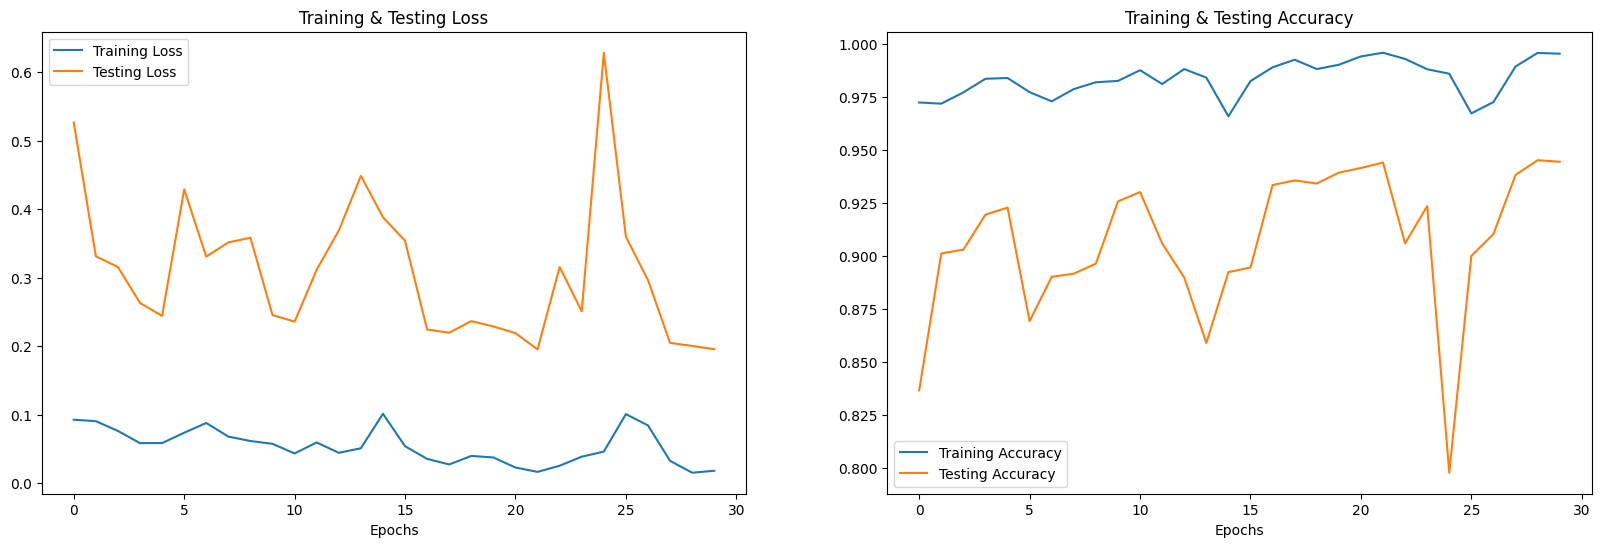

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

86/86 [==============================] - 4s 45ms/step


,Predicted Labels,Actual Labels
0,sad,sad
1,fear,fear
2,angry,angry
3,fear,neutral
4,angry,angry
5,angry,angry
6,neutral,neutral
7,neutral,neutral
8,disgust,disgust
9,happy,happy


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Predicted Labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Actual Labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Actual Labels'].value_counts()
    for x_label, grp in _df_2.groupby('Predicted Labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predicted Labels')
_ = plt.ylabel('Actual Labels')

In [ ]:
df0

,Predicted Labels,Actual Labels
0,sad,sad
1,fear,fear
2,angry,angry
3,fear,neutral
4,angry,angry
...,...,...
2722,neutral,neutral
2723,angry,angry
2724,fear,fear
2725,neutral,neutral


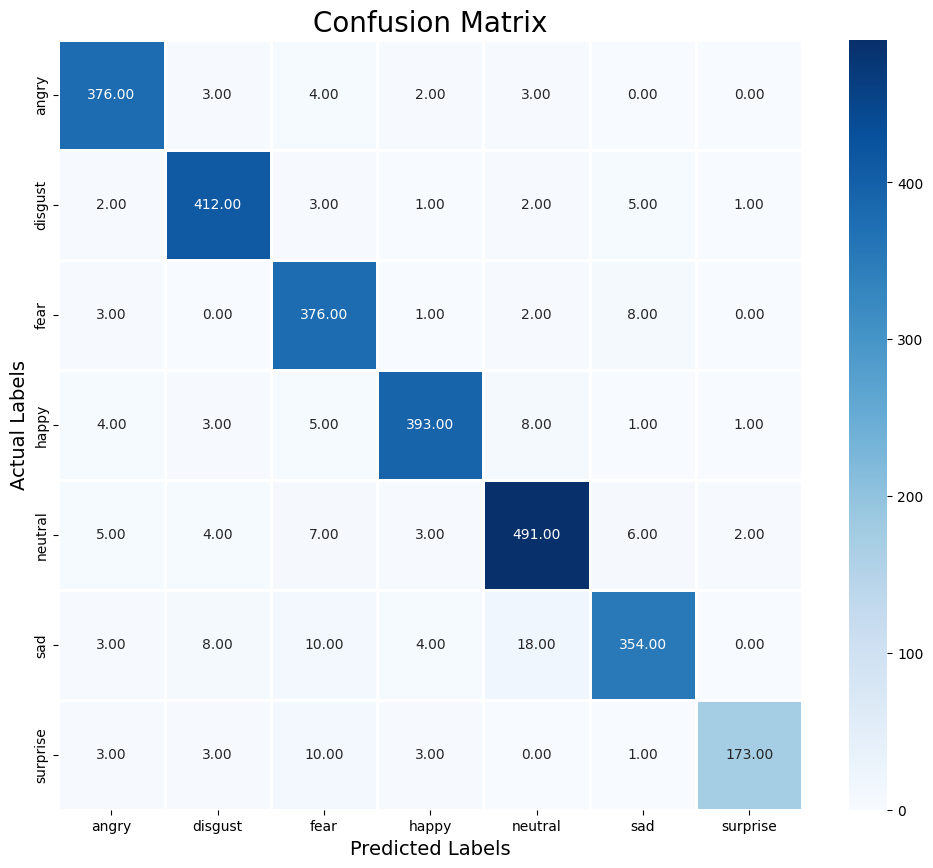

              precision    recall  f1-score   support

       angry       0.95      0.97      0.96       388
     disgust       0.95      0.97      0.96       426
        fear       0.91      0.96      0.93       390
       happy       0.97      0.95      0.96       415
     neutral       0.94      0.95      0.94       518
         sad       0.94      0.89      0.92       397
    surprise       0.98      0.90      0.94       193

    accuracy                           0.94      2727
   macro avg       0.95      0.94      0.94      2727
weighted avg       0.94      0.94      0.94      2727



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("drive/MyDrive/kaggle/working/CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/MyDrive/kaggle/working/CNN_model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('drive/MyDrive/kaggle/working/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("drive/MyDrive/kaggle/working/best_model1_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

86/86 [==============================] - 5s 49ms/step - loss: 0.1286 - accuracy: 0.9575
accuracy: 95.75%


In [ ]:
import pickle

# Saving scaler
with open('drive/MyDrive/kaggle/working/scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('drive/MyDrive/kaggle/working/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('drive/MyDrive/kaggle/working/encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('drive/MyDrive/kaggle/working/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('drive/MyDrive/kaggle/working/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("drive/MyDrive/kaggle/working/best_model1_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
import pickle

with open('drive/MyDrive/kaggle/working/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('drive/MyDrive/kaggle/working/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [ ]:
import librosa

In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [ ]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)

    return final_result

In [ ]:
# def rmse(data, frame_length=2048, hop_length=512):
#     rmse = librosa.feature.rms(data, frame_length=frame_length, hop_length=hop_length)
#     return np.squeeze(rmse)
def rmse(data, frame_length=2048, hop_length=512):
    rms_values = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rms_values)

In [ ]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])

In [ ]:
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_result = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_result.T) if not flatten else np.ravel(mfcc_result.T)

In [ ]:
prediction("drive/MyDrive/kaggle/Test/t1.m4a")

<ipython-input-72-2465fdfd1194>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


1/1 [==============================] - 0s 27ms/step
sad
